In [ ]:
!nvidia-smi

Sun Sep 15 09:39:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0              43W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 33.5/235.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

# Live Tracking of boxing gloves

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="xkxR1b3F4tbjK07lwjhH")
project = rf.workspace("boxing-uuhxl").project("boxing-gloves-detection")
version = project.version(5)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Boxing-Gloves-Detection--5 in yolov8:: 100%|██████████| 7502/7502 [00:01<00:00, 5140.41it/s]


In [ ]:
model = YOLO("yolov8n.yaml")
model.train(data="/content/Boxing-Gloves-Detection--5/data.yaml", epochs=200, imgsz=640)



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d8c945e6590>
fitness: 0.6616779160067279
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.64098])
names: {0: 'Boxing-Glove'}
plot: True
results_dict: {'metrics/precision(B)': 0.8769315069782413, 'metrics/recall(B)': 0.757441332408524, 'metrics/mAP50(B)': 0.8479659206347627, 'metrics/mAP50-95(B)': 0.6409792488258351, 'fitness': 0.6616779160067279}
save_dir: PosixPath('runs/detect/train4')
speed: {'preprocess': 0.13686376369267797, 'inference': 0.5217579783350708, 'loss': 0.00044463915073603296, 'postprocess': 5.790584723665783}

# Live Camera Tracking

Since webcam cannot be accessed in google colab, we can use the following script to take pictues using the webacam and analyze it.

<IPython.core.display.Javascript object>


0: 480x640 1 Boxing-Glove, 47.5ms
Speed: 2.4ms preprocess, 47.5ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)


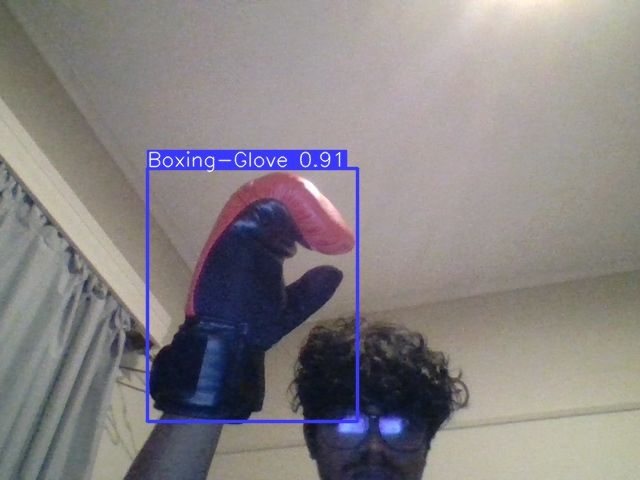

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import cv2
import numpy as np
from PIL import Image
import io
import base64
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to be more manageable
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for the capture button to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
        ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = io.BytesIO(base64.b64decode(data.split(',')[1]))
    img = Image.open(binary)
    img.save(filename)
    return np.array(img)
try:
    while True:
        img = take_photo()
        results = model(img)
        annotated_frame = results[0].plot()
        display(Image.fromarray(annotated_frame))
        cv2.waitKey(1)

except KeyboardInterrupt:
    print("Stopped live video detection.")

In [ ]:
# Assuming YOLOv8 is already loaded as model
results = model(img)

# Display the result
annotated_frame = results[0].plot()
Image.fromarray(annotated_frame).show()


0: 480x640 1 Boxing_Glove, 65.8ms
Speed: 1.6ms preprocess, 65.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


## Object Detection in Boxing

We use the following dataset and code to put boxes over the faces, gloves, body and the fighters.

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="xkxR1b3F4tbjK07lwjhH")
project = rf.workspace("goodgoose").project("project-boxing-qwxns")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Project-Boxing-1 in yolov8:: 100%|██████████| 350/350 [00:00<00:00, 6787.97it/s]


In [ ]:
model = YOLO("yolov8n.yaml")
model.train(data="/content/Project-Boxing-1/data.yaml", epochs=350, imgsz=640)



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d8cc489ca30>
fitness: 0.37130212458402145
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.33679,      0.4169,     0.35078,     0.13564,     0.42493])
names: {0: 'body', 1: 'boxer', 2: 'face', 3: 'gloves', 4: 'referee'}
plot: True
results_dict: {'metrics/precision(B)': 0.7400017212410794, 'metrics/recall(B)': 0.6620603107644849, 'metrics/mAP50(B)': 0.7159377022879084, 'metrics/mAP50-95(B)': 0.33300928261692286, 'fitness': 0.37130212458402145}
save_dir: PosixPath('runs/detect/train3')
speed: {'preprocess': 0.1994490623474121, 'inference': 0.49403905868530273, 'loss': 0.0005483627319335938, 'postprocess': 0.774073600769043}

Let us apply this model onto a youtube video of people sparring

In [ ]:
results = model.predict(source="/content/test2.mp4", save=True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/2952) /content/test2.mp4: 384x640 (no detections), 47.9ms
video 1/1 (2/2952) /content/test2.mp4: 384x640 (no detections), 7.5ms
video 1/1 (3/2952) /content/test2.mp4: 384x640 (no detections), 7.1ms
video 1/1 (4/2952) /content/test2.mp4: 384x640 (no detections), 7.4ms
video 1/1 (5/2952) /content/test2.mp4: 384x640 (no detections), 7.8ms
video 1/1 (6/2952) /content/test2.mp4: 384x640 (no detections), 7.3ms
video 1/1 (7/2952) /content/test2.m

Let us write a colission detection script. Every time the boxes on the gloves and the face collide, it counts it as a head shot. Similarly, everytime the boxes on the gloves and the body collide it counts it as a body shot. There are also cooldown frames so that duplicates shots are not counted.

In [ ]:
import cv2
def detect_collision(box1, box2):
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2
    if x1_max < x2_min or x1_min > x2_max:
        return False
    if y1_max < x2_min or y1_min > x2_max:
        return False
    return True

def count_hits(predictions, cooldown_frames=50):
    body_shots = 0
    head_shots = 0
    cooldown = 0

    for pred in predictions:
        if cooldown > 0:
            cooldown -= 1
            continue
        boxes = pred.boxes
        body_boxes = [box.xyxy[0].tolist() for box in boxes if box.cls == 0]  # Class 2 is "Body"
        face_boxes = [box.xyxy[0].tolist() for box in boxes if box.cls == 2]  # Class 3 is "Face"
        gloves_boxes = [box.xyxy[0].tolist() for box in boxes if box.cls == 3]  # Class 1 is "Gloves"

        for body_box in body_boxes:
            for glove_box in gloves_boxes:
                if detect_collision(body_box, glove_box):
                    body_shots += 1
                    cooldown = cooldown_frames
                    break
        for face_box in face_boxes:
            for glove_box in gloves_boxes:
                if detect_collision(face_box, glove_box):
                    head_shots += 1
                    cooldown = cooldown_frames
                    break

    total_shots = body_shots + head_shots
    return body_shots, head_shots, total_shots
body_shots, head_shots, total_shots = count_hits(results, cooldown_frames=50)

print(f"Body Shots: {body_shots}")
print(f"Head Shots: {head_shots}")
print(f"Total Shots: {total_shots}")


Body Shots: 16
Head Shots: 6
Total Shots: 22
